Introduction
============

The opposite of numerical integration is a numerical derivative.  The standard definition of a derivative, the one you see in
the calculus books, is

\begin{equation}
\displaystyle \frac{\mathrm{d}f}{\mathrm{d}x} = \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h}
\end{equation}

Which is basically saying that the derivative of a function can be found at point $x$ by taking the difference between
the function at $f(x)$ from at $f(x+h)$, where $h$ is a very small value.  The exact derivative of the function $f(x)$
will be found in the limit as $h$ goes to $0$. 

The basic method for calculating a derivative numerically is precisely an implementation of this formula.  We can't take the
limit $h \rightarrow 0$ all the way to $0$ in practice, but we can make $h$ very small and then calculate

\begin{equation}
\displaystyle \frac{\mathrm{d}f}{\mathrm{d}x} \approx \frac{f(x+h) - f(x)}{h}
\end{equation}

For example, we can calculate the derivative of a function analytically at say $x=2$, like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
def forward_difference_derivative(f, x, h=1e-8):
    """Calculate an approximation to the derivative of the function f at the point x using forward difference method.
    Use x+h as the forward sample point, to define straight line that gives slope as approximation
    of the derivative at point x
    
    f - A Python function that takes a single scalar x (or an array of x) as input, and calculates function value
        at the point given.
    x - A scalar float value (or numpy array of values).  The point(s) to calculate the derivative of the function at.
    h - A scalar float value, the sample interval size, defaults to 1e-8
    """
    return (f(x+h) - f(x)) / h

# some function to calculate derivative of
def f(x):
    return x**4 - 2*x + 1

# example, empirically compare effect of smaller interval h sizes on accuracy of derivative at point x=2
limit = 1e-20
h = 0.1
x = 2.0
while h >= limit:
    df = forward_difference_derivative(f, x, h)
    print( "x=%f  h=%e  df/dx = %0.20f" % (x, h, df) ) 
    h *= 0.1

x=2.000000  h=1.000000e-01  df/dx = 32.48100000000004428102
x=2.000000  h=1.000000e-02  df/dx = 30.24080099999934390098
x=2.000000  h=1.000000e-03  df/dx = 30.02400800099635347351
x=2.000000  h=1.000000e-04  df/dx = 30.00240008006470660007
x=2.000000  h=1.000000e-05  df/dx = 30.00024000101574017663
x=2.000000  h=1.000000e-06  df/dx = 30.00002400277422864860
x=2.000000  h=1.000000e-07  df/dx = 30.00000237562970539784
x=2.000000  h=1.000000e-08  df/dx = 30.00000017294722454153
x=2.000000  h=1.000000e-09  df/dx = 30.00000248221111576186
x=2.000000  h=1.000000e-10  df/dx = 30.00000248221111220914
x=2.000000  h=1.000000e-11  df/dx = 30.00000248221111220914
x=2.000000  h=1.000000e-12  df/dx = 30.00266701747021258484
x=2.000000  h=1.000000e-13  df/dx = 29.98490344907620652748
x=2.000000  h=1.000000e-14  df/dx = 30.55333763768428312346
x=2.000000  h=1.000000e-15  df/dx = 26.64535259100373565389
x=2.000000  h=1.000000e-16  df/dx = 0.00000000000000000000
x=2.000000  h=1.000000e-17  df/dx = 0.000

Analytically, we can empirically compute the derivative of the function we just used

\begin{equation}
\displaystyle \frac{\mathrm{d}f}{\mathrm{d}x} (x^4 - 2x + 1) = (4x^3 - 2) |_{2.0} = 30
\end{equation}

In [3]:
x = 2.0
print( 4.0 * x**3.0 - 2 ) 

30.0


Notice that as $h$ got smaller, we approached the true answer of $30$, up to a point.  Once $h < 1\times10^{-8}$, the calculated
derivative at the point actually began to diverge from the true answer.  This is again an example of problems in accuracy that
arise when subtracting numbers that are almost equal to one another.  For values of $h$ that differed by less than $\frac{1}{2}$
of the available precision, the difference between the 2 values of $f$ become smaller and smaller, allowing more of the
error in the representation to dominate in the calculated difference between the 2 points.  And of course, our machine
float is incapable of representing numbers more precisely than $16$ digits of precision, thus the function evaluates to the same
value when we pass in 2 points that differ by less than that number of decimal places (and we see that the difference appears to be
$0$ for all calculations of smaller $h$).

The approximation that we used of the derivative in our first limit equations is known as the *forward difference*, because 
it's measured in the forward direction from $x$.  There is also the *backward difference*, which has the mirror image
definition

\begin{equation}
\displaystyle \frac{\mathrm{d}f}{\mathrm{d}x} \approx \frac{f(x) - f(x-h)}{h}
\end{equation}

In [4]:
def backward_difference_derivative(f, x, h=1e-8):
    """Calculate an approximation to the derivative of the function f at the point x using backward difference method.
    Use x-h as the backward sample point, to define straight line that gives slope as approximation
    of the derivative at point x
    
    f - A Python function that takes a single scalar x (or an array of x) as input, and calculates function value
        at the point given.
    x - A scalar float value (or numpy array of values).  The point(s) to calculate the derivative of the function at.
    h - A scalar float value, the sample interval size, defaults to 1e-8
    """
    return (f(x) - f(x-h)) / h


# try it again, using the backward difference
limit = 1e-20
h = 0.1
x = 2.0
while h >= limit:
    df = backward_difference_derivative(f, x, h)
    print( "x=%f  h=%e  df/dx = %0.20f" % (x, h, df) ) 
    h *= 0.1
    
# try taking the average of the forward and backward difference approximation
h = 1e-8
x = 2.0
df_forward = forward_difference_derivative(f, x, h)
df_backward = backward_difference_derivative(f, x, h)
dfdx_avg = (df_forward + df_backward) / 2.0

print( "Average of forward and backward: %0.20f" % dfdx_avg ) 

x=2.000000  h=1.000000e-01  df/dx = 27.67900000000000915179
x=2.000000  h=1.000000e-02  df/dx = 29.76079900000011946304
x=2.000000  h=1.000000e-03  df/dx = 29.97600799899657175729
x=2.000000  h=1.000000e-04  df/dx = 29.99760008000506061876
x=2.000000  h=1.000000e-05  df/dx = 29.99976000097602479855
x=2.000000  h=1.000000e-06  df/dx = 29.99997599673064385684
x=2.000000  h=1.000000e-07  df/dx = 29.99999761499337580517
x=2.000000  h=1.000000e-08  df/dx = 29.99999964004017272146
x=2.000000  h=1.000000e-09  df/dx = 30.00000248221111576186
x=2.000000  h=1.000000e-10  df/dx = 30.00000248221111220914
x=2.000000  h=1.000000e-11  df/dx = 30.00000248221111220914
x=2.000000  h=1.000000e-12  df/dx = 30.00266701747021258484
x=2.000000  h=1.000000e-13  df/dx = 29.98490344907620652748
x=2.000000  h=1.000000e-14  df/dx = 30.02043058586420798406
x=2.000000  h=1.000000e-15  df/dx = 33.75077994860473040717
x=2.000000  h=1.000000e-16  df/dx = 0.00000000000000000000
x=2.000000  h=1.000000e-17  df/dx = 0.000

The forward and backward differences typically give about the same answer, and in many cases you can use either.  Most often, one
uses the forward difference.  There are a few special cases where one is preferred over the other, particularly when there
is a discontinuity in the derivative of the function at the point x or when the domain of the function is bounded and you
want the value of the derivative on the boundary, in which case only one or the other of the two difference formulas will work.

If you recall from your calculus, the definite integral over some interval can be interpreted as calculating the area under the 
curve of the function with the interval.  The derivative also has a common useful interpretation.  The derivative gives us the
instantaneous rate of change of the function at the point where we evaluate the derivative of the function.  That is to say, 
the derivative is the slope of line that is tangent to the function at the point of evaluation.  This instanteous rate of change
has many interpretations depending on what the function models.  If the model function is giving the location of an object
over time, then the derivative calculates the speed of the object at each point in time of the objects position.

Visually, we can see the the forward and backward difference are approximating the derivative of a function $f(x)$ at
the point $x$ in terms of the slopes of small segments measured in the forward direction from $x$ and the backward
direction respectively

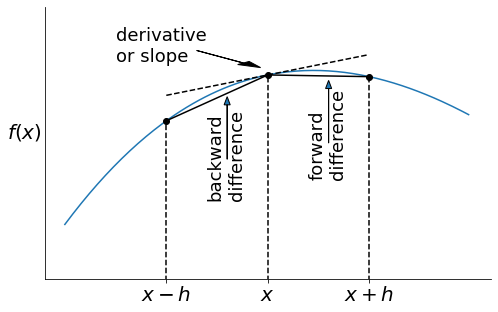

In [5]:
def f(x):
    return 0.25*x**3 - 2.5*x**2 + 5*x + 8

# plot some function
x = np.arange(0, 2, 0.01)
plt.figure(figsize=(8,5))
plt.plot(x, f(x))

# evalute derivative at x=1.0
x = 1.0
plt.plot(x, f(x), 'ko')

# backward difference
h = 0.5
plt.plot(x-h, f(x-h), 'ko')
plt.plot([x-h, x], [f(x-h), f(x)], 'k-')

# forward difference
plt.plot(x+h, f(x+h), 'ko')
plt.plot([x, x+h], [f(x), f(x+h)], 'k-')

# add some labels and text
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel("$f(x)$", fontsize=20, rotation='horizontal', labelpad=20)
plt.yticks([])
plt.xticks([0.5, 1.0, 1.5], ["$x-h$", "$x$", "$x+h$"], fontsize=20)
plt.axis([-0.1, 2.1, 7, 12])
plt.plot([x-h, x-h], [0, f(x-h)], 'k--')
plt.plot([x, x], [0, f(x)], 'k--')
plt.plot([x+h, x+h], [0, f(x+h)], 'k--')
plt.text(0.7, 8.5, "backward\ndifference", fontsize=18, rotation='vertical', color='black')
plt.arrow(0.8, 9.2, 0, 1, head_width=0.03, head_length=0.15)
plt.text(1.2, 8.9, "forward\ndifference", fontsize=18, rotation='vertical', color='black')
plt.arrow(1.3, 9.5, 0, 1, head_width=0.03, head_length=0.15)

# plot the tangent line
x = 1.0
h = 1e-8
dfdx = (f(x+h) - f(x)) / h # the derivative, gives us approximation of slope at x
x = np.arange(0.5, 1.5, 0.01)
y = dfdx * (x - 1.0) + f(1.0) # point slope formula
plt.plot(x, y, 'k--')
plt.text(0.25, 11.0, "derivative\nor slope", fontsize=18)
plt.arrow(0.65, 11.2, 0.23, -0.23, head_width=0.08, head_length=0.12, color='black');

# Errors on the Derivative Approximation

Before using either the forward or backward difference, we must choose a value for $h$.  As you have seen, the numerical approximation of the derivative, using our simple method, appears to be most accurate for values of $h \approx 10^{-8}$.
To work out why this is, and what value of $h$ we should use, lets look at the errors and inaccuracies involved in calculating
the numerical derivative more closely.

Calculations of derivatives using forward and backward differences ore not perfectly accurate.  We of course have rounding error
of the type we have discussed in previous lecture notebooks.  Also, there is approximation error since we cannot really
take the limit all the way to $h \rightarrow 0$, so our differences are not really the true derivative of the function at
the evaluation point.  In contrast to numerical integration where rounding error is usually negligible, it turns out that
both sources of error are important when we calculate a derivative.

To understand why this is, let us focus on the forward difference.  We will consider the Taylor expansion of $f(x)$ about
$x$, as we did when considering the error on the integral:

\begin{equation}
f(x+h) = f(x) + hf'(x) + \frac{1}{2}h^2f''(x) + ...
\end{equation}

where $f'$ and $f''$ are the first and second derivatives of $f$.  Rearranging this expresison, we get

\begin{equation}
f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{1}{2}hf''(x) + ...
\end{equation}

This means that when we were calculating the forward difference, we were only calculating the first part on the right-hand
side, and we neglect the term in $f''(x)$ and all higher terms.  The size of these neglected terms measures the
approximation error on the forward difference.  Thus, to leading order in $h$, the absolute magnitude of the approximation
error is $\frac{1}{2}h|f''(x)|$, which is linear in $h$ so that, as we would expect, we should get more accurate answers if we use
smaller values of $h$.

But as we have already mentioned, subtracting numbers from one another on a computer can lead to large rounding errors
(in percentage terms of the magnitude of the result) if the numbers are close to one another.  And that's exactly what
happens here, the numbers $f(x+h)$ and $f(x)$ that we are subtracting will be very close to one another when we
make $h$ small.  Thus if we make $h$ too small, we will get a large rounding error in our result.  

This puts us in a difficult situation in regards to numerical differentiation.  On the one hand, we want $h$ to be as small
as possible, in order to reduce the approximation error.  But on the other hand, the smaller $h$ gets, the larger the
effects of rounding error will be on the impact of the accuracy of our result.  To get the best possible answer we are going
to have to strike a delicate balance, and find a good compromise for the value of $h$.

Lets analyze the error in more detail.  We have seen that empirically, an $h$ of $10^{-8}$ seems to give the best result
(for our built-in float type representations).  Recall that when we talked about rounding errors before, typically we 
calculate a number such as $f(x)$ to an accuracy of $Cf(x)$, where the value of the error constant $C$ can vary but is typically
about $C = 10^{-16}$ in Python and other environments using a standard 64 bit float representation.  Since $f(x+h)$ is
normally close in value to $f(x)$ when performing numerical differentiation, the accuracy of the value for $f(x+h)$
will also be about the same, and the absolute magnitude of the total rouding error on $f(x+h) - f(x)$ will, in the worst
case, be about $2C|f(x)|$.  It might be better than this if the two errors go in opposite directions and happen to cancel
out, but we cannot assume that this will be the case.  Then the worst-case rounding error on the complete forward
difference approximation will be $2C|f(x)|/h$.

Meanwhile, the approximation error is, as we have calculated, about $\frac{1}{2}h|f''(x)|$, which means that the total error
$\epsilon$ on our derivative in the worst case is (ignoring the higher order approximation error terms as being insignificant):

\begin{equation}
\epsilon = \frac{2C|f(x)}{h} + \frac{1}{2}h|f''(x)|
\end{equation}

What we really want to do is find the value of $h$ that minimizes this error.  So we differentiate this error expression 
with respect to $h$ and set the result equal to zero (so that we can find where the $\epsilon$ error is at its minimum),
which gives:

\begin{equation}
-\frac{2C|f(x)|}{h^2} + \frac{1}{2}|f''(x)| = 0
\end{equation}

or solving for $h$

\begin{equation}
h = \sqrt{4C \, \Big| \frac{f(x)}{f''(x)} \Big| }
\end{equation}

Substituting this value back into our $\epsilon$ error expression, we find the the error on our numerical calculation
of the derivative is

\begin{equation}
\epsilon = h|f''(x)| = \sqrt{4C|f(x)f''(x)|}
\end{equation}

Thus for instance if $f(x)$ and $f''(x)$ are of order 1, we should choose $h$ to be roughly of order $\sqrt{C}$, which
will typically be about $10^{-8}$

In [6]:
C = 1e-16
print( np.sqrt(C) ) 

1e-08


Which is the same result that we were observing empirically.  A similar analysis can be applied to the backward difference,
and gives the same end result.  

In other words, we can get about half of the usual numerical precision on our derivatives, but not better.  If the precision is,
as here, about 16 digits, then we can get 8 digits of precision on our derivatives.  This is substantially poorer than the
precision we demonstrated that we could calculate for the integral of a function.  This could be a significant source of
error for calculations that require high accuracy.

# Central Difference Method

We have seen that the forward and backward differences are not very accurate.  What can we do to improve the situation?.
A simple improvement is to use the *central difference*:

\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}x} \approx \frac{f(x+h/2) - f(x-h/2)}{h}
\end{equation}

The central difference is similar to the forward and backward differences, approximating the derivative using the difference
between tow values of $f(x)$ at points a distance $h$ apart.  What's changed is that the two points are now placed symmetrically 
around $x$, one at a distance $\frac{1}{2}h$ in the forward direction and the other at a distance $\frac{1}{2}h$ in the backward
direction.

To calculate the approximation error on the central difference we write two Taylor expansions:

\begin{equation}
f(x+h/2) = f(x) + \frac{1}{2}hf'(x) + \frac{1}{8}h^2f''(x) + \frac{1}{48}h^3f'''(x) + ...
\end{equation}

\begin{equation}
f(x-h/2) = f(x) - \frac{1}{2}hf'(x) + \frac{1}{8}h^2f''(x) - \frac{1}{48}h^3f'''(x) + ...
\end{equation}

Subtracting the second expression from the first (our central difference approximation) and rearranging for $f'(x)$, we
get

\begin{equation}
f'(x) = \frac{f(x+h/2) - f(x-h/2)}{h} - \frac{1}{24}h^2f'''(x) + ...
\end{equation}

Which means that the leading order magnitude of the error for the central difference method is now $\frac{1}{24}h^2|f'''(x)|$,
which is one order in $h$ higher than before.  There is also, as before, a rounding error, but its size is unchanged
from our previous analysis of the total error, having magnitude $2C|f(x)|/h$, so the magnitude of the total error
on our estimate of the derivative is

\begin{equation}
\epsilon = \frac{2C|f(x)|}{h} + \frac{1}{24}h^2|f'''(x)|
\end{equation}

Differentiating to find the minimum value for $h$ and rearranging, we find that the optimal value of $h$ is

\begin{equation}
h = \Big(24C \Big| \frac{f(x)}{f'''(x)} \Big| \Big)^{1/3}
\end{equation}

and once again substituting this back into our original $\epsilon$ error expression, we find the optimal error itself to
be

\begin{equation}
\epsilon = \frac{1}{8}h^2|f'''(x)| = (\frac{9}{8}C^2[f(x)]^2 | f'''(x) |)^{1/3}
\end{equation}

Thus for instance, if $f(x)$ and $f'''(x)$ are of order 1, the ideal value of $h$ is going to be around $h \simeq C^{1/3}$,
which is typically about $10^{-5}$ but the error itself will be around $C^{2/3}$, or about $10^{-10}$.

In [7]:
C = 1e-16
print( C**(1.0/3.0) ) 
print( C**(2.0/3.0) ) 

4.641588833612782e-06
2.1544346900318868e-11


Lets confirm this empirically using the same function as before (recall that the derivative of this function at $x=1$ is $30$.

In [8]:
def central_difference_derivative(f, x, h=1e-5):
    """Calculate an approximation to the derivative of the function f at the point x using central difference method.
    Use x-h/2 as the backward sample point and x+h/2, to define straight line that gives slope as approximation
    of the derivative at point x
    
    f - A Python function that takes a single scalar x (or an array of x) as input, and calculates function value
        at the point given.
    x - A scalar float value (or numpy array of values).  The point(s) to calculate the derivative of the function at.
    h - A scalar float value, the sample interval size, defaults to 1e-8
    """
    return (f(x + h/2.0) - f(x - h/2.0)) / h

def f(x):
    return x**4 - 2*x + 1

# compute the central difference
limit = 1e-20
h = 0.1
x = 2.0
while h >= limit:
    df = central_difference_derivative(f, x, h)
    print( "x=%f  h=%e  df/dx = %0.20f" % (x, h, df) ) 
    h *= 0.1

x=2.000000  h=1.000000e-01  df/dx = 30.01999999999995338840
x=2.000000  h=1.000000e-02  df/dx = 30.00019999999938136170
x=2.000000  h=1.000000e-03  df/dx = 30.00000200000307160053
x=2.000000  h=1.000000e-04  df/dx = 30.00000002000290422188
x=2.000000  h=1.000000e-05  df/dx = 29.99999999975243270001
x=2.000000  h=1.000000e-06  df/dx = 30.00000000241697151182
x=2.000000  h=1.000000e-07  df/dx = 30.00000001307510899551
x=2.000000  h=1.000000e-08  df/dx = 29.99999964004017272146
x=2.000000  h=1.000000e-09  df/dx = 30.00000248221111576186
x=2.000000  h=1.000000e-10  df/dx = 30.00000248221111220914
x=2.000000  h=1.000000e-11  df/dx = 29.99982484652717218410
x=2.000000  h=1.000000e-12  df/dx = 30.00266701747021258484
x=2.000000  h=1.000000e-13  df/dx = 30.05595772265221654607
x=2.000000  h=1.000000e-14  df/dx = 29.84279490192418293759
x=2.000000  h=1.000000e-15  df/dx = 28.42170943040398256585
x=2.000000  h=1.000000e-16  df/dx = 0.00000000000000000000
x=2.000000  h=1.000000e-17  df/dx = 0.000

So notice that at $h=10^{-5}$ we had an answer accurate to 11 digits (our most accurate), confirming the analytical analysis
of the error.  Thus the central difference is indeed more accurate than the forward and backward difference, by a factor
of 100 to 1000 or so, though we get this improved accuracy by using a *larger* value of $h$.  This may seem slightly surprising,
but it is the correct result.

# Higher-Order Approximations for Derivatives

The numerical derivative, for all 3 methods we looked at, is basically calculating the slope of the line between 2 sample points.
Since the 2 points we choose are close together, and are on the function $f(x)$, the calculated slope should be close in
value to the derivative of the function around those points.  The trapezoidal rule, for approximating the integral, does
a similar thing if you recall.  It approximates the area under a curve by using a straight line between 2 sample points, and
calculating the area of the trapezoidal slice thus formed as approximating the area of the actual curve in the slice.

We saw that we can make a higher-order, and usually better, approximation to an integral by fitting a quadratic or higher order
polynomial instead of a straight line, and this led to the Simpson rule for integrals.  We can take a similar approach with
derivatives by fitting a polynomial to a set of sample points and then calculating the derivative of the polynomial at x.  Our
goal, of course, is to try get an even more accurate estimate of the derivative than even the central difference can calculate.

Consider, for example, fitting a quadratic curve $y = ax^2 + bx + c$ to the function $f(x)$.  We require three sample points to
make the fit and, as with the central difference, the best results are obtained by placing the points symmetrically about
the point of interest $x$.  Suppose, for example, that we are interested in the derivative at $x=0$, so we place our three
points at $-h$, $0$ and $+h$, for some $h$ that we choose.  Requiring that our quadratic is equal to $f(x)$ at these three
points gives us three equations thus:

\begin{equation}
ah^2 - bh + c = f(-h) \; \; \; \; c = f(0) \; \; \; \; ah^2 + bh + c = f(h)
\end{equation}

In principle, we can now solve these equations for the three parameters $a$, $b$ and $c$.  (This is the same calculation that we
did for Simpson's rule when we discussed that integration method).  However, in this case, we don't need the whole solution, because
we don't need all of the parameters.  Given the quadratic fit $y = ax^2 + bx + c$, the derivative of the curve at point $x=0$
(by the rule of derivatives) is

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}x} = \big[ 2ax + b  \big]_{x=0} = b
\end{equation}

So we only need the one parameter, $b$, which we can get by subtracting the first equation from the third to give 
$2bh = f(h) - f(-h)$ and rearranging.  Thus our approximation for the derivative at $x=0$ is

\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}x} \approx \frac{f(h) - f(-h)}{2h}
\end{equation}

As we did with Simpson's rule, we have doen this calculation for the derivative at $x=0$, but the same result applies
at any other point.  We can slide the whole function up or down the x-axis, to put any point $x$ at the origin and then
calculate the derivative from the formula above.  Or, equivalently, we can just write

\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}x} \approx \frac{f(x+h) - f(x-h)}{2h}
\end{equation}

for general $x$.

This is the correct result for the quadratic approximation, but do you notice anything about the final form of the approximation
we have derived?  This form is nothin other than the central difference approximation again, for sample points $2h$ apart,
which we have already seen and discussed.  In other words, the higher-order approximation has not helped us in this case.

However, going to still higher orders does help.  If we use a cubic or quartic approximation, we do get improved estimates of the
derivative.  At higher orders this is a distinction between the odd- and even-order approximations.  For the odd-order ones the
sample points fall at "half-way" points, as with the central difference.  For instance, to get the four sample points required
for a cubic approximation, symmetrically distributed about zero, we would choose them to fall at 
$x=-\frac{3}{2}h, -\frac{1}{2}h, \frac{1}{2}h,$ and $\frac{3}{2}h$  For even-order approximations, on the other hand, the
samples fall at "integer" points; the five points for the quartic approximation, for instance, fall at
$-2h, -h, 0, h,$ and $2h$.

The methodology for deriving the higher-order approximations follows the same pattern as for the quadratic case: we
write down the required value of the polynomial at each of the sample points, which gives us a set of simultaneous
equations in the polynomial coefficients.  As before, we actually need only one of those coefficients, the coefficient
of the linear term in the polynomial.  Solving for this coefficient gives us our expression for the derivative.  At each
order the expression is a linear combination of the samples, divide by $h$.

The coefficients for central approximations to the first derivative of $f(x)$ at $x=0$ are as follows.  To derive the
full expression for an approximation, choose a value for $h$, calculate $f(x)$ at the needed offsets, and multiply the
sampled location of $f(x)$ by the coefficients, summing these values together and dividing the result by $h$.  For
instance, the cubic approximation would be $[ \frac{1}{24} f(x-\frac{3}{2}h) - \frac{27}{24} f(x-\frac{1}{2}h)] + \frac{27}{24} f(x+\frac{1}{2}h) - \frac{1}{24} f(x+\frac{3}{2}h) ]$.  The final column gives the order of the approximation error on the
derivative.


\begin{array}{c|ccccccccccc|c}
\mathrm{Degree} & f(-\frac{5}{2}h) & f(-2h) & f(-\frac{3}{2}h) & f(-h) & f(-\frac{1}{2}h) & f(0) & f(\frac{1}{2}h) & f(h) & f(\frac{3}{2}h) & f(2h) & f(\frac{5}{2}h)& \mathrm{Error} \\
\hline
1 & &              &               &              & -1             &   & 1             &             &               &              & & O(h^2) \\
2 & &              &               & -\frac{1}{2} &                &   &               & \frac{1}{2} &               &              & & O(h^2) \\
3 & &              &  \frac{1}{24} &              & -\frac{27}{24} &   & \frac{27}{24} &             & -\frac{1}{24} &              & & O(h^4) \\
4 & & \frac{1}{12} &               & -\frac{2}{3} &                &   &               & \frac{2}{3} &               & -\frac{1}{12} & & O(h^4) \\
5 & -\frac{3}{640} &              & \frac{25}{384} &              & -\frac{75}{64} &   & \frac{75}{74} &             & -\frac{25}{384} &              & \frac{3}{640} & O(h^6) \\
\end{array}

Each of the approximations given in the table will be exact (apart from rounding error) if the function being differentiated
is actually a polynomial of the appropriate (or lower) degree, so that the polynomial fit is a perfect one.  Most of the
time, however, this will not be the case and there will also be an approximation error involved in calculating the
derivative.  And, as we saw, appropriate values for $h$ have to be choosen, such that the approximation error and the
rounding error are balanced.

In the next cell, we show an example of implementing the 5th degree approximation of the derivative.  We also determine
empirically, a suitable value for $h$ to use for this degree approximation:

In [9]:
# implementation left as an exercise for the student.

# Second (and Higher) Derivatives

We can also derive numerical approximations for the second derivative of a function $f(x)$.  The second derivative is, by
definition, the derivative of the first derivative.  So we can calculate it by applying our first-derivative formulas twice.
For example, starting with the central difference formula, we can write expressions for the first derivative at 
$x+h/2$ and $x-h/2$ thus

\begin{equation}
f'(x+h/2) \approx \frac{f(x+h) - f(x)}{h} \,\,\, f'(x-h/2) \approx \frac{f(x) - f(x-h)}{h}
\end{equation}

Then we apply the central difference again to get an expression for the second derivative:

$\begin{eqnarray}
f''(x) \approx& \frac{f'(x+h/2) - f'(x-h/2)}{h} \\
              =& \frac{[ f(x+h) - f(x) ]/h - [f(x) - f(x-h)]/h }{h} \\
              =& \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{eqnarray}
$

This is again a simple approximation for the second derivative, using the central difference method applied twice.

We can also calculate the error on the second numerical derivative.  We perform two Taylor expansions of $f(x)$ thus

\begin{equation}
f(x+h) = f(x) + hf'(x) + \frac{1}{2}h^2f''(x) + \frac{1}{6}h^3f'''(x) + \frac{1}{24}f''''(x) + ...
\end{equation}

\begin{equation}
f(x-h) = f(x) - hf'(x) + \frac{1}{2}h^2f''(x) - \frac{1}{6}h^3f'''(x) + \frac{1}{24}f''''(x) - ...
\end{equation}

Adding them together and rearranging, we find that 

\begin{equation}
f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} - \frac{1}{12}h^2f''''(x) + ...
\end{equation}

The first term on the right is our formula for the second derivative, and the remainder of the terms once again represents
the approximation error of our calculation.  Thus, to leading order, the error inherent in our approximation of the
second derivative is $\frac{1}{12}h^2|f''''(x)|$  As before, we also need to take rounding error into account, which
contributes an error of roughly $C|f(x)|$ on each value of $f(x)$ so that, in the worst case, the total rounding error in the
numerator of our second derivative is $4C|f(x)|/h^2$.  Then the complete error on the second derivative approximation
is

\begin{equation}
\epsilon = \frac{4C|f(x)|}{h^2} + \frac{1}{12}h^2|f''''(x)|
\end{equation}

Differentiating with respect to $h$ and setting the result to zero then givens an optimum value of $h$ of

\begin{equation}
h = \Big(48C \Big| \frac{f(x)}{f''''(x)} \Big| \Big)^{1/4}
\end{equation}

Substituting this expression back into our equation for $\epsilon$ gives the size of the optimal error to be

\begin{equation}
\epsilon = \frac{1}{6}h^2|f''''(x)| = (\frac{4}{3}C|f(x)f''''(x)|)^{1/2}
\end{equation}

So if, for instance, $f(x)$ and $f''''(x)$ are of order 1, the error will (once again) be roughly of order $\sqrt{c}$, which
is typically $10^{-8}$.  This is about the same accuracy as we found for the forward and backward difference approximations
to the first derivative previously.  Thus our expression for the second derivative is not very accurate, about as good as, but
not better than, the forward difference.  There are higher-order approximations that can be made for the second derivative,
just as we showed for the first derivative, but we will not discuss them here.  

Also, you can of course continue this basic method to compute a third derivative, or higher derivatives.  However, the accuracy
will continue to decrease as you attempt higher derivitives using this basic method of the central difference applied
multiple times.  Thus, if you need higher derivatives in a calculation, you will often be forced to used higher-order methods
in order to retain needed accuracy.

# Partial Derivatives

There are many cases in scientific modeling where you need to calculate a 
[partial derivative](http://en.wikipedia.org/wiki/Partial_derivative), derivatives of a function
of several variables with respect to only one of those variables.  A partial derivative is still the rate of change of
the function at some point, but we are only interested in the rate of change for one of multiple dimensions (where each
variable is a dimension), when we hold all other dimensions constant at some point.

The calculation of such partial derivatives is a simple generalization of the calculation of ordinary derivatives.  Seeing an
example of how a partial derivative is calculated can also help us to understand what, exactly, is being calculated when
we take a partial derivative.  Lets say we have a two dimensional function, a function of two variables.  We haven't looked
at functions with 2 variables too much in this class.  Recall that a function of two dimensions (or two variables) will end
up defining a surface in three dimensional space.  For example, here is a function of 2 variables:

\begin{equation}
f(x,y) = z = sin(\sqrt{x^2 + y^2})
\end{equation}

In Python, we usually use the `meshgrid` function to create a 2 dimensional regular mesh of x,y pairs, so that we can see and
plot the corresponding three dimensional surface.  For example

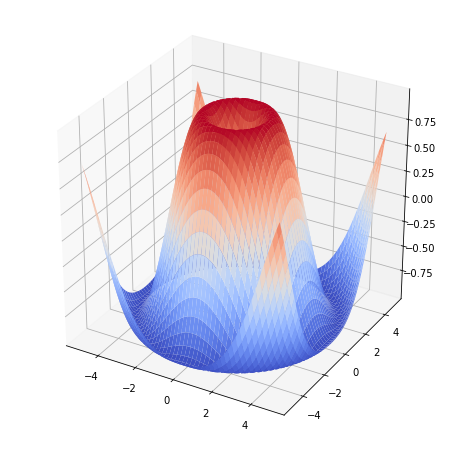

In [10]:
def f(x,y):
    """A function of 2 variables.  We still expect numpy arrays, where each corresponding value in x and y
    represent an x,y pair, of which we should compute the z value and return from this function.
    """
    return np.sin(np.sqrt(x**2.0 + y**2.0))

x = np.arange(-5.0, 5.0, 0.05)
y = np.arange(-5.0, 5.0, 0.05)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm);

Here the z axis goes up, and is computed from our function of 2 variables (and ranges from -1.0 to 1.0).  The x and y axis
range from -5.0 to 5.0.  We needed to use the `meshgrid()` method in order to generate pairs of x,y points, from which to
compute the z axis.

In any case, a partial derivative is the derivitive of the function, when we hold one of the variable constant.  For example,
if we hold y constant, say at $y  = 1.0$, we are basically slicing through our 3 dimensional figure, and reducing the 
curve to 2 dimensions:

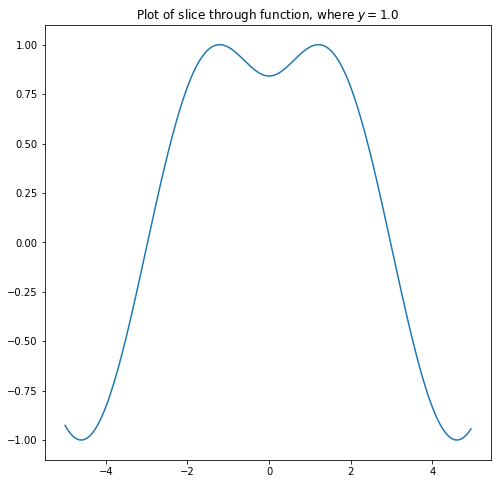

In [11]:
x = np.arange(-5.0, 5.0, 0.05)
y = np.ones(x.shape)
z = f(x, y)

plt.figure(figsize=(8, 8))
plt.plot(x,z)
plt.title('Plot of slice through function, where $y=1.0$');

And then if we take the partitial derivitive of our function with respect to x, holding y constant (at $y=1.0$), we are basically
asking for the derivitive of our above curve at some point, say when $x=3.0$.

The calculation of a partial derivative is a simple generalization of the calculation of ordinary derivatives.  If we have
a function $f(x,y)$ of two variables, then the central difference approximations to the derivitives with respect to $x$
and $y$ are:

\begin{equation}
\frac{\partial f}{\partial x} = \frac{f(x+h/2, y) - f(x-h/2,y)}{h}
\end{equation}

\begin{equation}
\frac{\partial f}{\partial y} = \frac{f(x, y+h/2) - f(x, y-h/2)}{h}
\end{equation}

So back to our example function, the partial derivative with respect to x, evaluated at $y=1.0$ at the point where $x=3.0$ is

In [12]:
h = 1e-10
x = 3.0
y = 1.0
pfpx = (f(x+h/2.0, y) - f(x-h/2.0, y)) / h

print( "Partial derivative with respect to x at x=3.0 with y=1.0 is:", pfpx ) 

Partial derivative with respect to x at x=3.0 with y=1.0 is: -0.948482611895507


In [13]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 4.18.0 17 generic x86_64 with debian buster sid
numpy 1.16.5
scipy 1.3.1
matplotlib 3.1.1
Mon Sep 30 07:53:50 2019 CDT

# Acknowledgement

The content of this notebook are based upon and borrowed heavily from Newmann (2012) "Computational Physics with Python", Chapter 5, Integrals and Derivatives.